## Data Set: OWID COVID Data
### Please check their repository
### https://github.com/owid/covid-19-data/tree/master/public/data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.tail()

In [2]:
# DtypeWarning: Columns (33) have mixed types. Check the column 33.
df.iloc[:,33].unique()

array([nan, 'tests performed', 'units unclear', 'samples tested',
       'people tested'], dtype=object)

#### There might have both numeric and non-numeric data in that column.
#### we can correct this by: df = pd.read_csv('owid-covid-data.csv', dtype={33: str})

In [3]:
df.shape

(376919, 67)

In [4]:
df_US = df[df['location']=='United States']
df_US.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
356287,USA,North America,United States,2024-02-04,103436829.0,NaN,NaN,1170784.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
356288,USA,North America,United States,2024-02-05,NaN,NaN,NaN,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
356289,USA,North America,United States,2024-02-06,NaN,NaN,NaN,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
356290,USA,North America,United States,2024-02-07,NaN,NaN,NaN,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
356291,USA,North America,United States,2024-02-08,NaN,NaN,NaN,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN


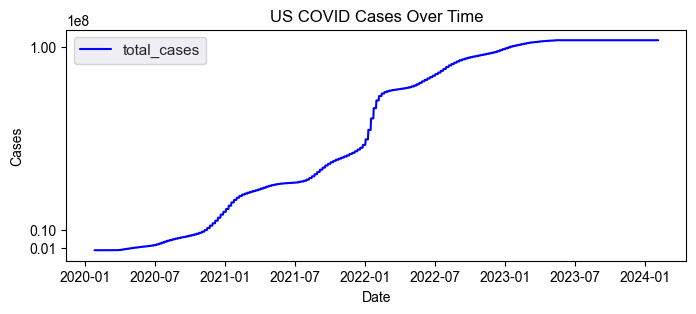

In [5]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.set_theme(style="darkgrid")

# Plot the data
sns.lineplot(data=df_US, x='date', y='total_cases', label='total_cases', color='blue')

# Set y-axis scale to linear
ax.set_yscale('linear')

# # Extract years for x-axis label
# years = df_US['date'].dt.year.unique()
# plt.xticks(ticks=df_US['date'], labels=years)

yticks = [10**6, 10**7, 10**8]
ax.set_yticks(yticks)

ax.set_xlabel('Date')
ax.set_ylabel('Cases')
ax.set_title('US COVID Cases Over Time')

plt.show()

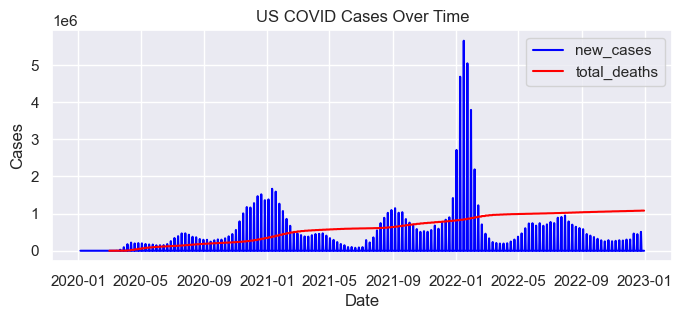

In [6]:
# Dataset stop updating new cases in the middle of 2023. Using data before 2023 only
df_US_2022 = df.loc[(df['location']=='United States')&(df['date'].dt.year <= 2022)]
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(8, 3))

# Plot the data
sns.lineplot(data=df_US_2022, x='date', y='new_cases', label='new_cases', color='blue')
sns.lineplot(data=df_US_2022, x='date', y='total_deaths', label='total_deaths', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Cases')
ax.set_title('US COVID Cases Over Time')

plt.show()

In [7]:
df['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

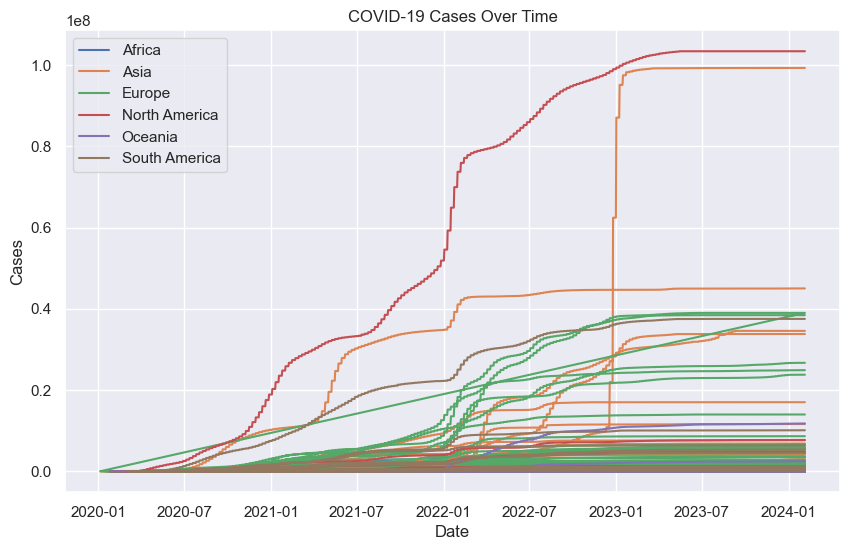

In [8]:
list_continents = ['Asia', 'Europe', 'Africa', 'Oceania', 'North America', 'South America']
df_continent = df[df['continent'].isin(list_continents)]

grouped = df_continent.groupby('continent')

# Plot the lines for each country
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
for continent, data in grouped:
    plt.plot(data['date'], data['total_cases'],label = continent)

plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('COVID-19 Cases Over Time')
plt.legend()
plt.show()

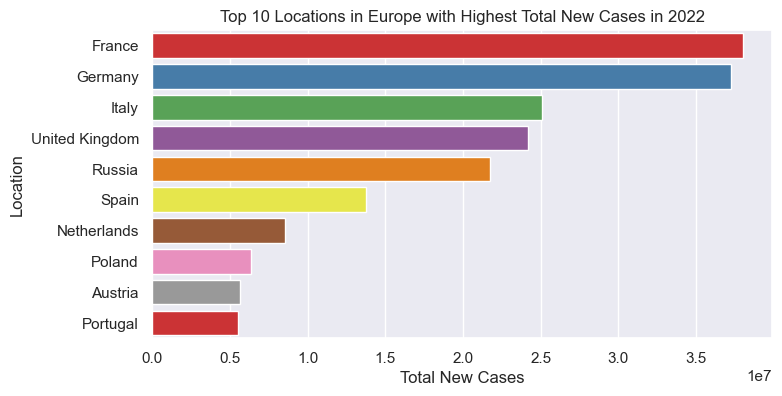

In [9]:
# Top 10 total new cases in specific period(2020-2022) in Europe
df_US_2022 = df.loc[(df['location']=='United States')&(df['date'].dt.year <= 2022)],[['date','new_cases']]
df_EU_2022 = df.loc[(df['continent'] == 'Europe') & (df['date'].dt.year <= 2022), ['date', 'location', 'new_cases']]

# Group location and sort
df_EU_2022_new_cases = df_EU_2022.groupby('location')['new_cases'].sum().reset_index()
df_EU_2022_top10 = df_EU_2022_new_cases.sort_values(by='new_cases', ascending=False).head(10)


fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="darkgrid")
sns.barplot(y="location", x="new_cases", data=df_EU_2022_top10,
            label="new_cases", hue = 'location' ,palette ="Set1")
ax.set_xlabel('Total New Cases')
ax.set_ylabel('Location')
ax.set_title('Top 10 Locations in Europe with Highest Total New Cases in 2022')
plt.show()

In [10]:
# 7-Day moving average, dataframe prep
info = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']

df_India = df.loc[(df['location']=='India')&(df['date'].dt.year <= 2022), info]
df_Italy = df.loc[(df['location']=='Italy')&(df['date'].dt.year <= 2022), info]
df_Singapore = df.loc[(df['location']=='Singapore')&(df['date'].dt.year <= 2022), info]
df_UK = df.loc[(df['location']=='United Kingdom')&(df['date'].dt.year <= 2022), info]
df_US = df.loc[(df['location']=='United States')&(df['date'].dt.year <= 2022), info]

data_of_interests = [df_India,df_Italy, df_Singapore, df_UK, df_US]

df_of_interest = pd.concat(data_of_interests, axis=0).fillna(0).reindex()
df_of_interest

,location,date,total_cases,new_cases,total_deaths,new_deaths
150703,India,2020-01-05,0.0,0.0,0.0,0.0
150704,India,2020-01-06,0.0,0.0,0.0,0.0
150705,India,2020-01-07,0.0,0.0,0.0,0.0
150706,India,2020-01-08,0.0,0.0,0.0,0.0
150707,India,2020-01-09,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
355883,United States,2022-12-27,99019493.0,0.0,1079976.0,0.0
355884,United States,2022-12-28,99019493.0,0.0,1079976.0,0.0
355885,United States,2022-12-29,99019493.0,0.0,1079976.0,0.0
355886,United States,2022-12-30,99019493.0,0.0,1079976.0,0.0


In [11]:
# 7-Day moving average & plots
df_of_interest.iloc[:,3:] = df_of_interest.iloc[:,3:].apply(lambda x: round(x.rolling(7).mean(),2))
df_of_interest.tail()

,location,date,total_cases,new_cases,total_deaths,new_deaths
355883,United States,2022-12-27,99019493.0,72572.71,1078242.86,433.29
355884,United States,2022-12-28,99019493.0,72572.71,1078676.14,433.29
355885,United States,2022-12-29,99019493.0,72572.71,1079109.43,433.29
355886,United States,2022-12-30,99019493.0,72572.71,1079542.71,433.29
355887,United States,2022-12-31,99019493.0,72572.71,1079976.00,433.29


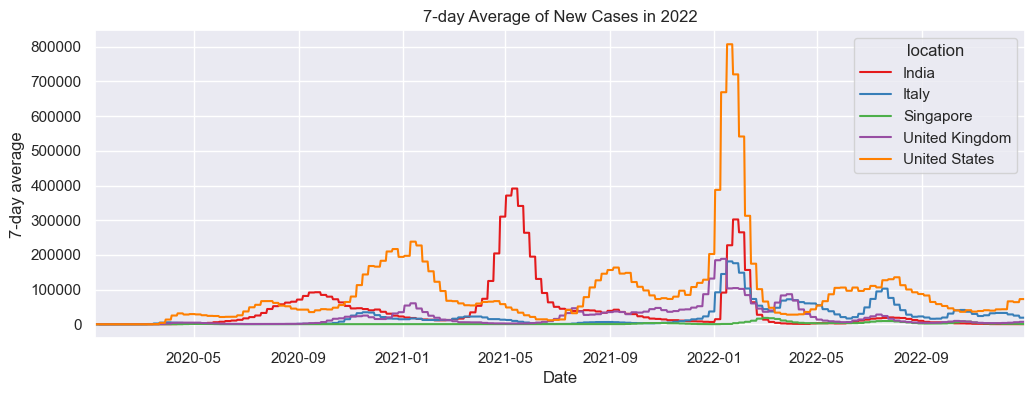

In [12]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.set_theme(style="darkgrid")
sns.lineplot(x="date", y="new_cases", data=df_of_interest, hue = 'location' ,palette ="Set1")
ax.set_xlim(df_of_interest.iloc[1,1], df_of_interest.iloc[-1,1])
ax.set_xlabel('Date')
ax.set_ylabel('7-day average')
ax.set_title('7-day Average of New Cases in 2022')
plt.show()

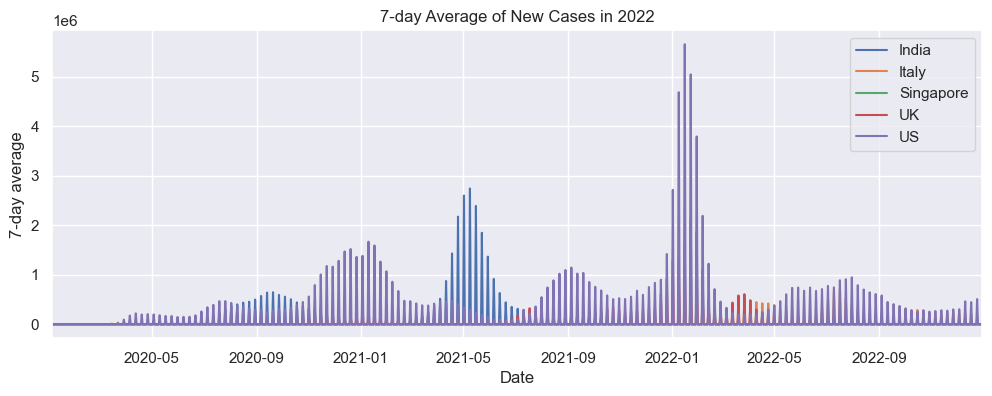

In [13]:
# 7-day average

fig, ax = plt.subplots(figsize=(12, 4))
data_of_interests = [df_India,df_Italy, df_Singapore, df_UK, df_US]
countries = ['India','Italy', 'Singapore', 'UK','US']

def func_plot(data, counter):
    ax.plot(data['date'], data['new_cases'],label = countries[counter])

for i in range(len(data_of_interests)):
    counter = i
    func_plot(data_of_interests[i], i)

min_date = df_of_interest['date'].min()
max_date = df_of_interest['date'].max()
ax.set_xlim(min_date, max_date)

ax.set_xlabel('Date')
ax.set_ylabel('7-day average')
ax.set_title('7-day Average of New Cases in 2022')
plt.legend()
plt.show()